In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.viz

In [2]:
# Compare between experiments in a list
experiment_list = [
    "sense_t24_random-agent_BC_rsp10",
    "sense_t24_random-agent_BC_rsp20",
                    ]
# human readable names for experiments
label_list = [
    "BC_rsp10",
    "BC_rsp20",
                ]
experiment_label = dict(zip(experiment_list, label_list))

# specify a color for each plot
color_list = list(matplotlib.colors.TABLEAU_COLORS.keys())
experiment_color = dict(zip(experiment_list, color_list))



In [3]:
# Indicate which seed instance to use
seed_list = [20211229]
seed_no = seed_list[0]

# Set mode to train or test
mode = "test"
print(mode)

location = "tokyo"

year = 1995

timeslots_per_day = 24

metric_list = [
    # "reward_rec",
    # "ep_done_rec",
    "action_log",
    # "sense_dc_log",
    # "henergy",
    # "penergy",
    # "benergy",
    # "menergy",
    # "req_obs",
    "sense_reward_log",
    "enp_reward_log",
    
            ]

# specify different linestyles for different metrics
linestyle_list = ['solid', 'dotted', 'dashed', 'dashdot']
metric_linestyle = dict(zip(metric_list, linestyle_list))


test


In [4]:
# dictionary to hold experimental data
experiment_traces = {}

# load data from each experiment
for experiment in experiment_list:
    # Load data of experiment and store in a dictionary
    experiment_instance_tag = experiment + '-' + str(seed_no)
    experiment_traces[experiment_instance_tag]={}
    root_folder = os.path.dirname(os.getcwd())
    exp_results_folder = os.path.join(root_folder,"results", experiment, mode) # folder with results of the experiment
    exp_results_file = os.path.join(exp_results_folder, experiment_instance_tag + '-'+ mode + '.npy') # experiment data file
    trace = np.load(exp_results_file,allow_pickle='TRUE').item()
    experiment_traces[experiment] = trace[location][year] # load to dictionary

In [9]:
START_DAY = 0
NO_OF_DAY_TO_PLOT = 3

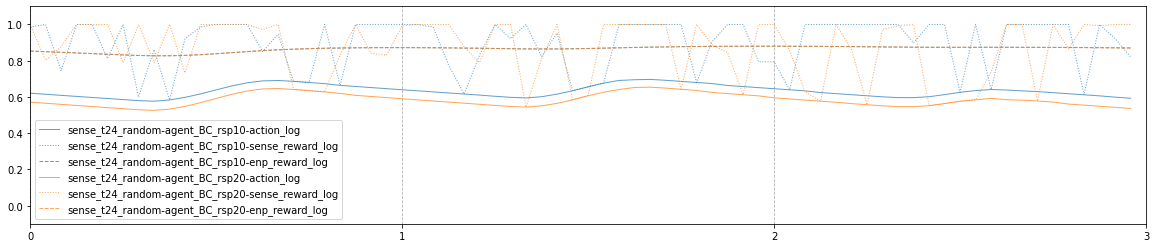

In [11]:
# Draw figure
##############
fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=[20,4],
                        sharex=True)

# check if traces have the same length
# we check the lenght of henergy obs trace for each experiment
trace_length = 0
for experiment in experiment_list:
    if trace_length != 0:
        assert trace_length == len(experiment_traces[experiment]["env_log"][:,1])
    else:
        trace_length = len(experiment_traces[experiment]["env_log"][:,1])
        

NO_OF_TIMESLOTS_PER_DAY = timeslots_per_day
NO_OF_DAY_TO_PLOT = int(min(NO_OF_DAY_TO_PLOT, trace_length/NO_OF_TIMESLOTS_PER_DAY))
END_DAY = START_DAY + NO_OF_DAY_TO_PLOT

start_index = START_DAY*NO_OF_TIMESLOTS_PER_DAY
end_index = END_DAY*NO_OF_TIMESLOTS_PER_DAY
    

for experiment in experiment_list:
    axs.grid(which='major', axis='x', linestyle='--')
    axs.set_ylim(-0.1,1.1)
    axs.set_xlim([0,NO_OF_TIMESLOTS_PER_DAY*NO_OF_DAY_TO_PLOT])
    xtick_resolution = max(1,int(NO_OF_DAY_TO_PLOT/10))
    axs.set_xticks(np.arange(start=0,
                                      stop=NO_OF_TIMESLOTS_PER_DAY*(NO_OF_DAY_TO_PLOT+1),
                                      step=NO_OF_TIMESLOTS_PER_DAY*xtick_resolution))
    axs.set_xticklabels(np.arange(start=START_DAY,
                                           stop=END_DAY+1,
                                           step=xtick_resolution))


    for metric in metric_list:
        axs.plot(experiment_traces[experiment][metric][start_index:end_index],
                 color=experiment_color[experiment],
                 alpha=0.7,
                 linewidth=1.0,
                 linestyle=metric_linestyle[metric],
                 label=experiment + "-" + metric)
        axs.legend(loc="lower left",
                    # ncol=7,
                    # bbox_to_anchor=(0,1.0,1,1)
                  )
    
    
    
    
    
    
    
#     # Get Environment Log
#     ################################################################    

#     reward_rec = run_log['reward_rec']
#     sense_dc_log = run_log['sense_dc_log']
#     env_log = run_log['env_log']

#     henergy_obs_rec=env_log[:,1]
#     penergy_obs_rec=env_log[:,2]
#     benergy_obs_rec=env_log[:,3]
#     menergy_obs_rec=env_log[:,4]
#     req_obs_rec=env_log[:,5]


   




#     sense_dc_ax  = axs

    


#     sense_dc_ax.plot(sense_dc_log[start_index:end_index], 
#                      color='tab:blue', alpha=0.7,linewidth=1.0, label="sense_dc")
#     sense_dc_ax.plot(req_obs_rec[start_index:end_index], 
#                      color='tab:orange',linestyle='--',linewidth=1.0, label="req_dc")
#     sense_dc_ax.plot(benergy_obs_rec[start_index:end_index], 
#                      color='tab:red',linewidth=1.0, label="battery")
#     sense_dc_ax.plot(menergy_obs_rec[start_index:end_index], 
#                      color='tab:red',linestyle='--',linewidth=1.0, alpha=0.5,label="batt10d")
#     if show_reward:
#         sense_dc_ax.plot(reward_rec[start_index:end_index],
#                          color='tab:purple', alpha=0.7,linewidth=1.0, label="reward")
#     if show_henergy:
#         sense_dc_ax.plot(henergy_obs_rec[start_index:end_index],
#                          color='k',linewidth=0.25,alpha=0.5, label="henergy")
#     #     sense_dc_ax.plot(penergy_obs_rec[start_index:end_index],
#     #                      color='k',linestyle='--',linewidth=0.25, label="penergy")


#     sense_dc_ax.set_xlim([0,NO_OF_TIMESLOTS_PER_DAY*NO_OF_DAY_TO_PLOT])
#     xtick_resolution = max(1,int(NO_OF_DAY_TO_PLOT/10))
#     sense_dc_ax.set_xticks(np.arange(start=0,
#                                       stop=NO_OF_TIMESLOTS_PER_DAY*(NO_OF_DAY_TO_PLOT+1),
#                                       step=NO_OF_TIMESLOTS_PER_DAY*xtick_resolution))
#     sense_dc_ax.set_xticklabels(np.arange(start=START_DAY,
#                                            stop=END_DAY+1,
#                                            step=xtick_resolution))
#     sense_dc_ax.legend(loc="lower left",
#                        ncol=7,
#                        bbox_to_anchor=(0,1.0,1,1))

#     sense_dc_ax.set_xlabel("Days")
#     plt.close()
#     return fig
#     # plt.show()
#     # End of sorl_plot
#     ########################################################

In [7]:
experiment_traces[experiment].keys()

dict_keys(['reward_rec', 'ep_done_rec', 'action_log', 'sense_dc_log', 'env_log', 'sense_reward_log', 'enp_reward_log', 'avg_henergy', 'avg_req', 'avg_rwd', 'downtimes'])

In [8]:
def compare_trace(experiment_list,
                  metric_list,
                  seed_no,
                  mode,
                  location,
                  year,
                  timeslots_per_day=24,
                  show_henergy=True,
                  START_DAY=0,
                  NO_OF_DAY_TO_PLOT = 500):
    pass